In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

Goal for step 1: run through document by column. Column A: day (int), column B(string). time, column c: height in feel (float)

In [3]:
dataset = "ASTR19_S22_group_project_data(1).txt"
infile = open(dataset, 'r+')
lines = infile.readlines()

days = np.array(['        '])
time = np.array(['        '])
height = np.array(['       '])
for line in lines:
    sline = line.strip().split()
    #print(sline) 
    days = np.insert(days, 0, sline[0])
    time = np.insert(time, 0, sline[1])
    height = np.insert(height, 0, sline[2])
infile.close()
days = np.flip(days)
time = np.flip(time)
height = np.flip(height)
days = days[4:]
time = time[4:]
height = height[4:]
print(days)
print(time)
print(height)


['1' '1' '2' '2' '3' '3' '4' '4' '5' '5' '6' '6' '7' '7' '8' '8' '9' '9'
 '10' '10' '11' '11' '12' '12' '13' '13' '14' '14' '15' '15' '16' '16'
 '17' '17' '18' '18' '19' '19' '20' '20' '21' '21' '22' '22' '23' '23'
 '24' '24' '25' '25' '26' '26' '27' '27' '28' '28' '29' '29' '30' '30'
 '31' '31' '32' '32' '33' '33' '34' '34' '35' '35' '36' '36' '37' '37'
 '38' '38' '39' '39' '40' '40' '41' '41']
['8:07' '15:37' '8:55' '16:25' '9:45' '17:14' '10:35' '18:00' '11:28'
 '18:46' '12:22' '19:31' '13:24' '20:16' '3:22' '21:01' '4:07' '21:46'
 '4:50' '11:58' '5:31' '12:56' '6:08' '13:45' '6:47' '14:25' '7:22'
 '15:00' '7:59' '15:34' '8:34' '16:08' '9:10' '16:41' '9:45' '17:12'
 '10:21' '17:45' '10:57' '18:15' '11:38' '18:48' '12:25' '19:20' '2:22'
 '19:52' '2:58' '20:30' '3:37' '10:44' '4:23' '11:55' '5:15' '12:57'
 '6:09' '13:50' '7:05' '14:39' '7:58' '15:27' '8:50' '16:10' '9:40'
 '16:52' '10:30' '17:34' '11:19' '18:12' '12:10' '18:49' '1:32' '19:24'
 '2:13' '20:00' '2:54' '9:54' '3:39' '11:1

deletion of useless info

x axis = days


 and convertion of strings to floats

In [76]:
fDays = days.astype(float)
#print(fDays)
fHeight = height.astype(float)
#print(fHeight)
fHours = np.array([])
for i in time:
    splitTime = i.split(':')
    hoursMinutes = float(splitTime[0]) + (float(splitTime[1])/60.0)
    hoursMinutes = hoursMinutes/24
    fHours = np.append(fHours, hoursMinutes)
    #print(splitTime)
    
print(fHours)

[0.33819444 0.65069444 0.37152778 0.68402778 0.40625    0.71805556
 0.44097222 0.75       0.47777778 0.78194444 0.51527778 0.81319444
 0.55833333 0.84444444 0.14027778 0.87569444 0.17152778 0.90694444
 0.20138889 0.49861111 0.22986111 0.53888889 0.25555556 0.57291667
 0.28263889 0.60069444 0.30694444 0.625      0.33263889 0.64861111
 0.35694444 0.67222222 0.38194444 0.69513889 0.40625    0.71666667
 0.43125    0.73958333 0.45625    0.76041667 0.48472222 0.78333333
 0.51736111 0.80555556 0.09861111 0.82777778 0.12361111 0.85416667
 0.15069444 0.44722222 0.18263889 0.49652778 0.21875    0.53958333
 0.25625    0.57638889 0.29513889 0.61041667 0.33194444 0.64375
 0.36805556 0.67361111 0.40277778 0.70277778 0.4375     0.73194444
 0.47152778 0.75833333 0.50694444 0.78402778 0.06388889 0.80833333
 0.09236111 0.83333333 0.12083333 0.4125     0.15208333 0.46875
 0.18680556 0.51527778 0.22291667 0.55138889]


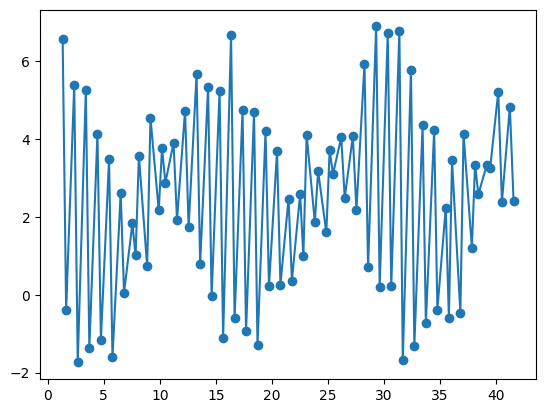

In [79]:
dayMinutes = np.array([0.0])
for i in range(82):
    dayTime = fDays[i]+fHours[i]
    dayMinutes = np.append(dayMinutes, dayTime)

dayMinutes = dayMinutes[1:]
#print(dayMinutes)
plt.scatter(dayMinutes, fHeight)
plt.plot(dayMinutes, fHeight)
y_err = 0.25
def sinx(x,a,b,E,d,g):
    return (g*np.sin((x**2))) + (fHeight * np.cos((b * x) + d)) + 0
    #fHeight is the height data. t


[ 1.00000000e+00  3.41625215e-07  2.00000000e+00  1.41026233e-05
 -1.18485127e-10]


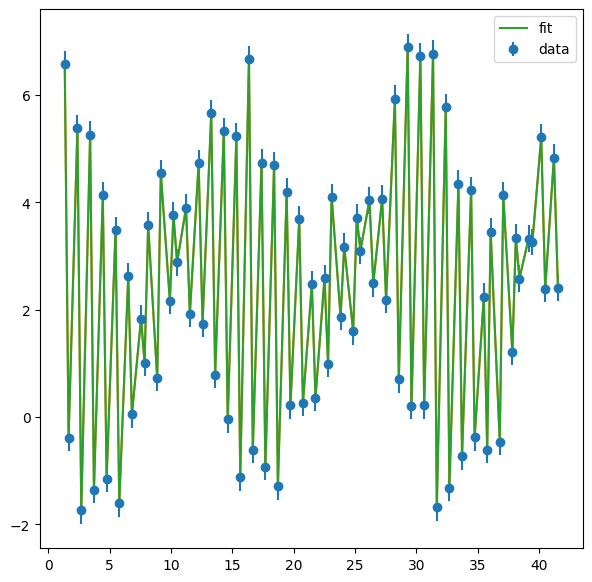

In [80]:
f = plt.figure(figsize=(7,7))
plt.errorbar(dayMinutes, fHeight,yerr=y_err, fmt='o', label = 'data')
plt.plot(dayMinutes, fHeight)
guess = [1.0, 0.0, 2.0, 0.0,0.5]
p, c = optimize.curve_fit(sinx, dayMinutes, fHeight, p0=guess)
print(p)
plt.plot(dayMinutes, sinx(dayMinutes, p[0],p[1],p[2],p[3],p[4]),label='fit')
plt.legend()

In [69]:
std_x = np.std(dayMinutes)
print(std_x)

11.794135848398644


[ 8.12008238e-10  6.02118355e-12  5.25677279e-10 -1.01934905e-10
  5.15624876e-10 -4.79796203e-11  5.94578609e-10 -2.06262785e-10
  3.27037508e-10 -1.01102238e-10  2.30865549e-10  8.34653666e-11
  3.19624771e-10  2.81770163e-11  4.74864148e-10  7.92147459e-11
  7.51239071e-10  2.50321097e-10  5.35854472e-10  4.19545287e-10
  6.78645140e-10  4.22975877e-10  7.24413418e-10  3.94090316e-10
  1.04004716e-09  1.82258209e-10  9.05823860e-10  2.34309516e-11
  1.03802833e-09 -2.31302977e-10  1.23475985e-09 -1.33970612e-12
  1.01269126e-09 -2.91019320e-10  9.17992793e-10 -3.89419164e-10
  9.68548797e-10  5.88830928e-11  7.49032836e-10 -8.18017876e-12
  5.93774363e-10  6.78224144e-11  5.03287634e-10  1.20291777e-10
  9.32253386e-10  5.52783153e-10  7.10200343e-10  5.17193621e-10
  8.49969428e-10  8.50850501e-10  1.14593846e-09  5.49376988e-10
  1.05191500e-09  4.88189045e-10  1.72490111e-09  1.75325088e-10
  1.94067962e-09  2.97046832e-11  2.06362483e-09  1.01063519e-10
  2.01464090e-09 -6.24528

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 82.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]),
 array([-0.5       , -0.43333333, -0.36666667, -0.3       , -0.23333333,
        -0.16666667, -0.1       , -0.03333333,  0.03333333,  0.1       ,
         0.16666667,  0.23333333,  0.3       ,  0.36666667,  0.43333333,
         0.5       ]),
 <BarContainer object of 15 artists>)

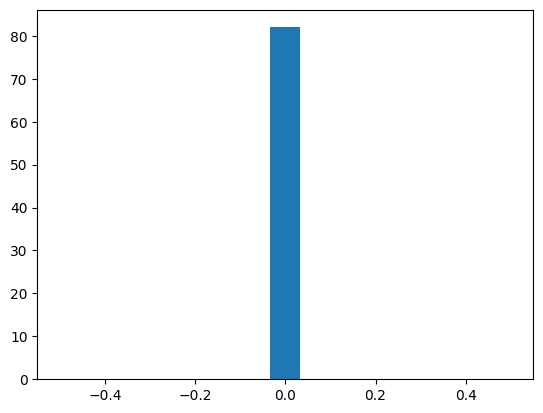

In [77]:
res = fHeight - sinx(dayMinutes, p[0],p[1],p[2],p[3],p[4])
print(res)
plt.hist(res, bins=15,range=(-0.5,0.5))
